In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()

## For county separated data
#input_files = os.listdir(cwd+"\Raw data")

## For all of Bay Area
input_files = os.listdir(cwd+"\Raw Bay Area data")

# Load and merge all the socioeconomic data together
df_from_each_file = (pd.read_csv(cwd+"\Raw Bay Area data\\"+f).set_index('FIPS') for f in input_files)
df_socio   = pd.concat(df_from_each_file,axis=1,ignore_index = False)
df_socio = df_socio.T.drop_duplicates().T.reset_index()#, ignore_index=True,axis = 1)
df_socio["TRACT"] = df_socio.FIPS.astype(str).apply(lambda x: x[4:10]).astype(int) #create tract ID

df_census = pd.read_csv(cwd+"\\bay_area_building_exposure.txt")
df_all =  pd.merge(df_census, df_socio.reset_index(), on = "TRACT")

#Load in aggregated structural asset value
df_asset_value = pd.read_csv("HH_total_asset_value.csv")
df_all = pd.merge(df_all,df_asset_value, how='inner', on='Full_tract')

print list(df_all)

['OBJECTID', 'GEO_ID', 'STATE', 'COUNTY', 'TRACT', 'NAME', 'LSAD', 'CENSUSAREA', 'Full_tract', 'FullTract_', 'Tract_1', 'RES1I', 'RES2I', 'RES3AI', 'RES3BI', 'RES3CI', 'RES3DI', 'RES3EI', 'RES3FI', 'RES4I', 'RES5I', 'RES6I', 'COM1I', 'COM2I', 'COM3I', 'COM4I', 'COM5I', 'COM6I', 'COM7I', 'COM8I', 'COM9I', 'COM10I', 'IND1I', 'IND2I', 'IND3I', 'IND4I', 'IND5I', 'IND6I', 'AGR1I', 'REL1I', 'GOV1I', 'GOV2I', 'EDU1I', 'EDU2I', 'TotalCount', 'ORIG_FID', 'RASTERVALU', 'POINT_X', 'POINT_Y', 'index', 'FIPS', 'Name', 'Shelter (Household Average), 2016', 'Shelter ($000), 2016', 'Housing (Household Average), 2016', 'Rent ($000), 2016', 'Rent (Household Average), 2016', 'Rent as pay ($000), 2016', 'Rent as pay (Household Average), 2016', '# Total Households with Interest, Dividends, or Net Rental Income, 2016', 'Housing, Median Rent ($), 2016', 'Housing, Median Value Owner Households ($), 2016', 'Aggregate Value of Any Financial Assets, 2016', 'Housing ($000), 2016', '# Population, 2016', '# Populati

In [34]:
'''
keep_columns = ['Shelter (Household Average), 2016', 'Shelter ($000), 2016', 'Housing (Household Average), 2016', 
                'Rent ($000), 2016', 'Rent (Household Average), 2016', 'Rent as pay ($000), 2016', 
                'Rent as pay (Household Average), 2016', '# Total Households with Interest, Dividends, or Net Rental Income, 2016', 
                'Housing, Median Rent ($), 2016', 'Housing, Median Value Owner Households ($), 2016', 
                'Aggregate Value of Any Financial Assets, 2016','# Population, 2016','Full_tract',
                '# Total Households, 2016','total_asset_value','% Housing, Renter Occupied, 2016',
               '# Housing, Renter Occupied, 2016']
'''

keep_columns = ['Rent ($000), 2016', 'Rent (Household Average), 2016',  
                'Housing, Median Rent ($), 2016', 'Housing, Median Value Owner Households ($), 2016', 
                'Aggregate Value of Any Financial Assets, 2016','# Population, 2016','Full_tract',
                '# Total Households, 2016','total_asset_value','% Housing, Renter Occupied, 2016',
               '# Housing, Renter Occupied, 2016']

df_out = df_all.drop(columns = [name for name in list(df_all) if name not in 
                                   keep_columns])
df_out = df_out.rename(index=str, columns={"Full_tract": "tract",
                                          'Housing, Median Value Owner Households ($), 2016':'hh_value_median'}).set_index('tract')

df_out = df_out.loc[(df_out['# Population, 2016']!=0) & (df_out['# Total Households, 2016']!=0) & (df_out['total_asset_value']!=0)]
      
df_out['rent_pc_1'] = df_out['Rent ($000), 2016']*1e3/df_out['# Population, 2016']
df_out['rent_pc_2'] = df_out['Housing, Median Rent ($), 2016']*12*df_out['# Housing, Renter Occupied, 2016']/df_out['# Population, 2016']
df_out['p_rent_pc'] = df_out['Housing, Median Rent ($), 2016']*12*df_out['# Housing, Renter Occupied, 2016']/df_out['# Population, 2016']


df_out['rent_tot_1'] = df_out['Rent ($000), 2016']*1e3
df_out['rent_tot_2'] = df_out['Housing, Median Rent ($), 2016']*12*df_out['# Housing, Renter Occupied, 2016']


df_out['rent_monthly_1'] = df_out['Rent ($000), 2016']*1e3/df_out['# Housing, Renter Occupied, 2016']/12
df_out['rent_monthly_2'] = df_out['Housing, Median Rent ($), 2016']

print df_out['# Population, 2016'].sum()


7674807


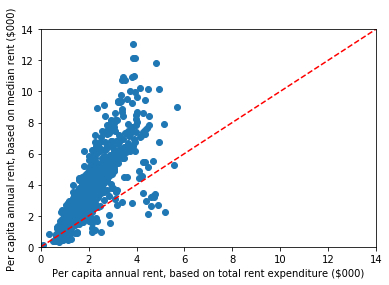

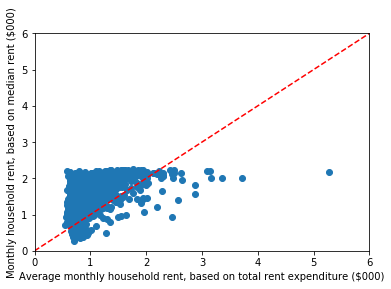

In [35]:
#RENT FIGURES
plt.figure()
plt.scatter(df_out['rent_pc_1']/1e3,df_out['rent_pc_2']/1e3)
plt.plot([0,14],[0,14],'--r')
plt.xlabel('Per capita annual rent, based on total rent expenditure ($000)')
plt.ylabel('Per capita annual rent, based on median rent ($000)')
plt.xlim(0,14)
plt.ylim(0,14)
plt.savefig('figs/rent_pc.png',dpi = 300)

plt.figure()
plt.scatter(df_out.rent_monthly_1/1000,df_out.rent_monthly_2/1000)
plt.xlabel('Average monthly household rent, based on total rent expenditure ($000)')
plt.ylabel('Monthly household rent, based on median rent ($000)')
plt.plot([0,6],[0,6],'--r')
plt.xlim(0,6)
plt.ylim(0,6)
plt.savefig('figs/rent_monthly.png',dpi = 300)


C:\Users\Mary\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\Mary\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\Mary\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


tract
6075017902    0.0
6075033204    0.0
6075980300    0.0
Name: k_house, dtype: float64
tract
6075017902    163002140.0
6075033204    406978669.9
6075980300     11400760.0
Name: k_str, dtype: float64
Average ratio of land/total 0.309007936175
Average ratio of str.total 0.690992063825
# of houses with land value <0 215


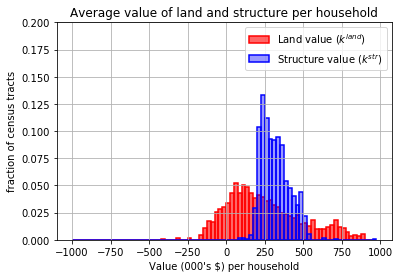

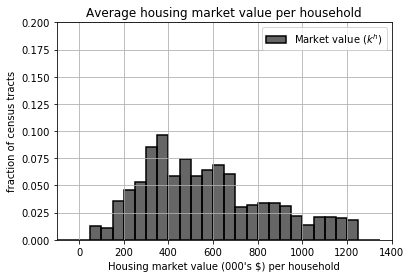

In [36]:
df_out.hhwgt= df_out['# Total Households, 2016'].astype(float)
df_out.pcwgt= df_out['# Population, 2016'].astype(float)
df_out.hh_value_median =  df_out.hh_value_median.astype(float)
df_out.f_rent = (df_out['% Housing, Renter Occupied, 2016']/100).astype(float)

df_out['k_house'] = df_out.hh_value_median * df_out.hhwgt
df_out['k_str'] = df_out.total_asset_value*1.
df_out['k_land'] = df_out.k_house - df_out.k_str

print df_out.k_house[df_out.k_house==0]
print df_out.k_str[df_out.k_house==0]
df_out.k_house.loc[6075017902] = df_out.k_house.loc[6001401700]
df_out.k_house.loc[6075033204] = df_out.k_house.loc[6075033203]
df_out.k_house.loc[6075980300] = df_out.k_house.loc[6075047702]


ratio_land2total = (1.*df_out.k_land.loc[df_out.hh_value_median!=0]/df_out.k_house.loc[df_out.hh_value_median!=0]).mean()
ratio_str2total = (1.*df_out.k_str.loc[df_out.hh_value_median!=0]/df_out.k_house.loc[df_out.hh_value_median!=0]).mean()
print 'Average ratio of land/total',ratio_land2total
print 'Average ratio of str.total',ratio_str2total
print '# of houses with land value <0',(df_out.k_land<0).sum()

## Code for manually adjusting land values
if False:
    df_out.k_house[df_out.k_land<0] = df_out.k_str[df_out.k_land<0] / ratio_str2total
    df_out.k_land = df_out.k_house-df_out.k_str

df_out['k_pc_h'] = df_out.k_house/df_out.pcwgt
df_out['k_pc_str'] = df_out.k_str/df_out.pcwgt
df_out['k_pc_land'] = df_out.k_land/df_out.pcwgt

df_out['k_hh_h'] = df_out.k_house/df_out.hhwgt
df_out['k_hh_str'] = df_out.k_str/df_out.hhwgt
df_out['k_hh_land'] = df_out.k_land/df_out.hhwgt

if True:
    plt.figure()
    weights = np.ones_like(df_out.k_hh_land/1e3)/float(len(df_out.k_hh_land/1e3))
    plt.grid('on')
    h = plt.hist(df_out.k_hh_land/1e3,weights = weights,bins = np.arange(-1000,1000,25),edgecolor='r',lw=1.5,fc=(1, 0, 0, 0.6))
    weights = np.ones_like(df_out.k_hh_str/1e3)/float(len(df_out.k_hh_str/1e3))
    plt.hist(df_out.k_hh_str/1e3,weights = weights,bins = np.arange(-1000,1000,25),edgecolor='b',lw=1.5,fc=(0, 0, 1, 0.4))
    plt.xlabel("Value (000's $) per household")
    plt.ylabel("fraction of census tracts")
    plt.ylim(0,0.2)
    plt.title('Average value of land and structure per household')

    plt.legend([r'Land value ($k^{land}$)',r'Structure value ($k^{str}$)'])
    plt.savefig('figs/'+'value_str_land.png',dpi = 300)


    plt.figure()
    weights = np.ones_like(df_out.k_hh_h/1e3)/float(len(df_out.k_hh_h/1e3))
    plt.grid('on')
    plt.hist(df_out.k_hh_h/1e3,weights = weights,bins = np.arange(-100,1400,50),edgecolor='k',lw=1.5,fc=(0, 0, 0, 0.6))
    plt.xlabel("Housing market value (000's $) per household")
    plt.ylabel("fraction of census tracts")
    plt.title('Average housing market value per household')

    plt.ylim(0,0.2)
    plt.xlim(-100,1400)
    plt.legend([r'Market value ($k^{h}$)'])
    plt.savefig('figs/'+'value_market.png',dpi = 300)


df_out['rent_from_k_h'] = df_out.k_hh_h *0.03/12
df_out['rent_from_k_h_tot'] = df_out.k_house *df_out.f_rent*0.03

if False:
    f, (ax1, ax2) = plt.subplots(1, 2,figsize = [12,5])
    ax1.scatter(df_out.rent_from_k_h,df_out.rent_monthly_1)
    ax1.set_ylim(0,3600)
    ax1.set_xlim(0,3600)
    ax1.plot([0,4000],[0,4000],'--r')
    ax1.set_xlabel(r"Monthly rent per hh, imputed from $k^{h}$")
    ax1.set_ylabel(r"Monthly rent per hh, from consumer expen.")
    ax1.set_title('From consumer expenditure survey')

    ax2.scatter(df_out.rent_from_k_h,df_out.rent_monthly_2)
    ax2.set_ylim(0,3600)
    ax2.set_xlim(0,3600)
    ax2.plot([0,4000],[0,4000],'--r')
    ax2.set_xlabel(r"Monthly rent per hh, imputed from $k^{h}$ ")
    ax2.set_ylabel(r"Monthly rent per hh, from median rent (census)")
    ax2.set_title('From median monthly rent (census)')
    f.suptitle('Datasets compatibility: monthly rent per household')
    plt.savefig('figs/'+'data_comp_monthly_rent.png',dpi = 300)

    f, (ax1, ax2) = plt.subplots(1, 2,figsize = [12,5])
    ax1.scatter(df_out.rent_from_k_h_tot/1e6,df_out.rent_tot_1/1e6)
    ax1.plot([0,200],[0,200],'--r')
    ax1.set_ylim(0,130)
    ax1.set_xlim(0,130)
    ax1.set_xlabel(r'Annual rent collected per census tract (\$ mil), imputed from $k^{h}$')
    ax1.set_ylabel(r"Annual rent per census tract (\$ mil), from consumer expen.")
    ax1.set_title('From consumer expenditure survey')

    ax2.scatter(df_out.rent_from_k_h_tot/1e6,df_out.rent_tot_2/1e6)
    ax2.plot([0,140],[0,140],'--r')
    ax2.set_ylim(0,130)
    ax2.set_xlim(0,130)
    ax2.set_xlabel(r'Annual rent collected per census tract (\$ mil), imputed from $k^{h}$')
    ax2.set_ylabel(r"Annual rent per census tract (\$ mil), from median rent")
    ax2.set_title('From median monthly rent (census)')
    f.suptitle('Datasets compatibility: total annual rent in census tract')
    plt.savefig('figs/'+'data_total_rent.png',dpi = 300)


In [37]:
df_out_4model = df_out[['k_pc_h','k_pc_str','k_pc_land','p_rent_pc']]
print df_out.loc[:,['k_pc_h','k_pc_str']]
df_out_4model.to_csv('Output\INPUT_real_estate_for_resilience_model.csv',index = True)

                   k_pc_h       k_pc_str
tract                                   
6001425103  209806.632994  123701.598837
6001425104  164176.357247  119592.120059
6001426100  420289.143387  174029.419954
6001427100  291338.682584  140035.822242
6001427800  295417.126492  113955.182975
6001428302  281258.944624  175921.385052
6001430300  224097.148515  149439.326757
6001430700  173820.521264  124617.283111
6001431100  152367.258083  103488.129330
6001432501  116901.427199   72086.551140
6001433103  135718.128810   85067.124304
6001433300  114927.421645  100989.148138
6001433900   88323.403175   74854.492754
6001435300  146124.523083   87443.662407
6001435800   97329.920339  109001.164424
6001436300   83609.489913   63968.041369
6001437000  112712.471733  104996.208257
6001437400   82060.233289   88336.993315
6001437702   76262.238146   47068.137548
6001438201   59721.487128   61822.756943
6001438300   69867.060561   81799.583949
6001440331  138124.722459   91213.845716
6001440335  2063